# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [1]:
!pip install faker

In [24]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from faker import Faker
fake = Faker()

In [4]:
name = []
LastName = []
deptid = []
for i in range(10500):
    name.append(fake.first_name())
    LastName.append(fake.last_name())
    deptid.append(random.randint(0,5))
eid = random.sample(range(25000,43000),10500)
phone = random.sample(range(1000000000,9999999999),10500)
salary = random.sample(range(45000,500000),10500)

In [5]:
states = [ 'Maine', 'New Hampshire','Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey','Maryland', 'Delaware', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']

In [6]:
state = []
for i in range(10500):
    state.append(random.choice(states))

In [7]:
df_emp = pd.DataFrame({'Employee_ID': eid, 'First_name': name, 'Last_Name':LastName, 'Phone': phone, 'State':state})
df_emp

,Employee_ID,First_name,Last_Name,Phone,State
0,29451,Kyle,Christensen,3381768367,Georgia
1,35486,Krista,Stone,2552802255,Maryland
2,26088,Rodney,Smith,9213519719,New York
3,27161,Robert,Sanchez,6035734145,Maryland
4,29303,Amber,Knapp,9695145030,Maine
...,...,...,...,...,...
10495,40817,Jeffrey,Evans,3925052087,South Carolina
10496,37675,Charles,Oneill,5782856609,Maryland
10497,30241,Nancy,Taylor,8105758278,New Hampshire
10498,25033,Kurt,Moore,4614165015,Massachusetts


In [8]:
df_salary = pd.DataFrame({'Employee_ID': eid, 'Department_ID': deptid, 'Annual_income': salary})
df_salary

,Employee_ID,Department_ID,Annual_income
0,29451,1,173651
1,35486,5,112599
2,26088,5,193450
3,27161,4,233680
4,29303,1,138835
...,...,...,...
10495,40817,5,93637
10496,37675,5,208056
10497,30241,2,273941
10498,25033,1,63448


In [9]:
df_department = pd.DataFrame({'Employee_ID': eid,'Department_ID': deptid})
df_department

,Employee_ID,Department_ID
0,29451,1
1,35486,5
2,26088,5
3,27161,4
4,29303,1
...,...,...
10495,40817,5
10496,37675,5
10497,30241,2
10498,25033,1


In [10]:
dept_Name = {0:'Testing',1:'QA',2:'Analytics',3:'Devops',4:'HR',5:'Engineering'}
x= []
for i in df_department['Department_ID']:
    x.append(dept_Name[i])
df_department['Department_Name'] = x

In [11]:
df_department

,Employee_ID,Department_ID,Department_Name
0,29451,1,QA
1,35486,5,Engineering
2,26088,5,Engineering
3,27161,4,HR
4,29303,1,QA
...,...,...,...
10495,40817,5,Engineering
10496,37675,5,Engineering
10497,30241,2,Analytics
10498,25033,1,QA


In [12]:
ans1 = pd.merge(df_department,df_salary)
ans1

,Employee_ID,Department_ID,Department_Name,Annual_income
0,29451,1,QA,173651
1,35486,5,Engineering,112599
2,26088,5,Engineering,193450
3,27161,4,HR,233680
4,29303,1,QA,138835
...,...,...,...,...
10495,40817,5,Engineering,93637
10496,37675,5,Engineering,208056
10497,30241,2,Analytics,273941
10498,25033,1,QA,63448


In [13]:
viz_1 = ans1.groupby(by = 'Department_Name').mean('Annual_income').sort_values(by = 'Annual_income',ascending=False)
viz_1

,Employee_ID,Department_ID,Annual_income
Department_Name,,,
Engineering,33738.747977,5.0,275379.597110
Devops,34028.934272,3.0,272016.786972
Analytics,34034.760833,2.0,271743.127181
Testing,34083.561485,0.0,271656.290023
HR,34001.902809,4.0,269655.847191
QA,33908.051541,1.0,267538.596639


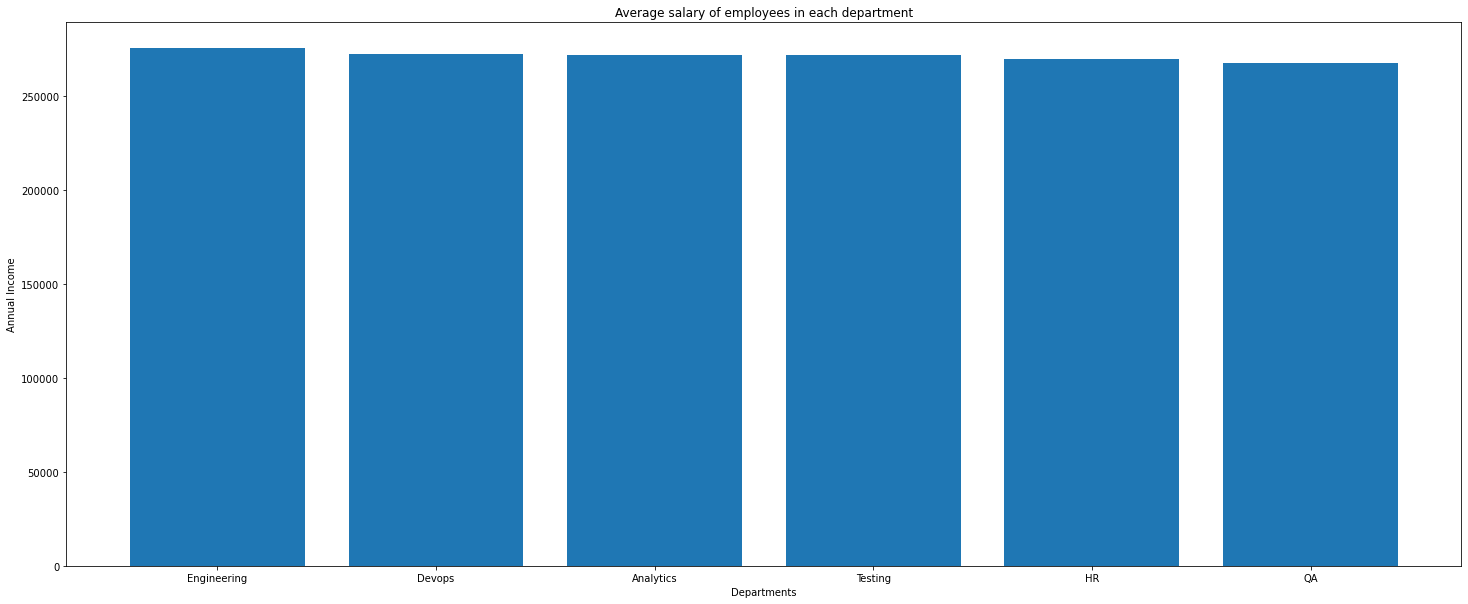

In [36]:
from matplotlib import pyplot as plt
viz_1 = viz_1.reset_index()
plt.figure(figsize=(25,10))
plt.bar(x = viz_1['Department_Name'], height = viz_1['Annual_income'])
plt.xlabel("Departments")
plt.ylabel("Annual Income")
plt.title("Average salary of employees in each department")
plt.show()

In [15]:
ans2 = pd.merge(df_emp,df_department)
ans2

,Employee_ID,First_name,Last_Name,Phone,State,Department_ID,Department_Name
0,29451,Kyle,Christensen,3381768367,Georgia,1,QA
1,35486,Krista,Stone,2552802255,Maryland,5,Engineering
2,26088,Rodney,Smith,9213519719,New York,5,Engineering
3,27161,Robert,Sanchez,6035734145,Maryland,4,HR
4,29303,Amber,Knapp,9695145030,Maine,1,QA
...,...,...,...,...,...,...,...
10495,40817,Jeffrey,Evans,3925052087,South Carolina,5,Engineering
10496,37675,Charles,Oneill,5782856609,Maryland,5,Engineering
10497,30241,Nancy,Taylor,8105758278,New Hampshire,2,Analytics
10498,25033,Kurt,Moore,4614165015,Massachusetts,1,QA


In [16]:
ans2_copy = ans2[['State','Department_Name','Employee_ID']].copy()
ans2_copy


,State,Department_Name,Employee_ID
0,Georgia,QA,29451
1,Maryland,Engineering,35486
2,New York,Engineering,26088
3,Maryland,HR,27161
4,Maine,QA,29303
...,...,...,...
10495,South Carolina,Engineering,40817
10496,Maryland,Engineering,37675
10497,New Hampshire,Analytics,30241
10498,Massachusetts,QA,25033


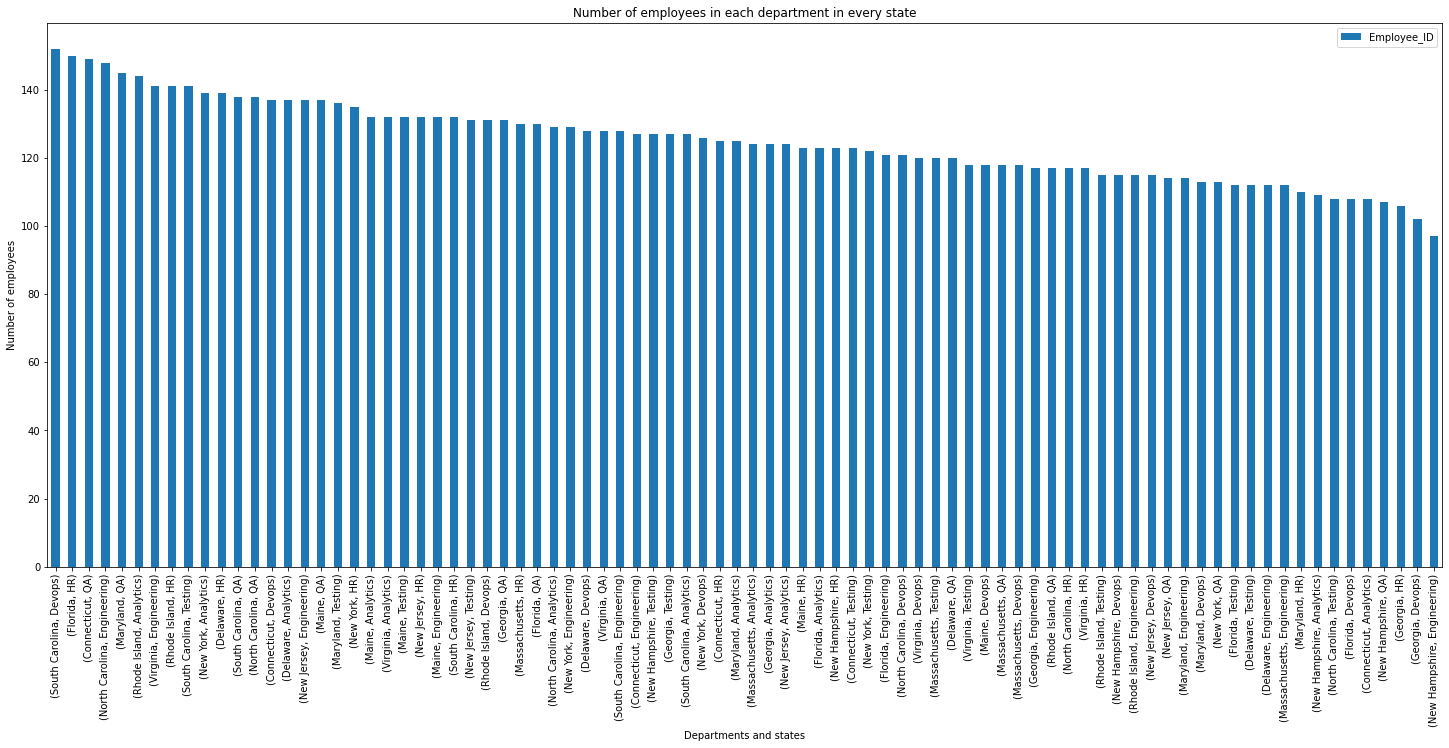

In [37]:
viz_2 = ans2_copy.groupby(['State','Department_Name']).count().sort_values(by = 'Employee_ID',ascending=False)
viz_2.plot(kind = 'bar',figsize=(25,10))
plt.xlabel("Departments and states")
plt.ylabel("Number of employees")
plt.title("Number of employees in each department in every state")
plt.show()

In [18]:
ans3 = pd.merge(df_salary,df_emp)
ans3

,Employee_ID,Department_ID,Annual_income,First_name,Last_Name,Phone,State
0,29451,1,173651,Kyle,Christensen,3381768367,Georgia
1,35486,5,112599,Krista,Stone,2552802255,Maryland
2,26088,5,193450,Rodney,Smith,9213519719,New York
3,27161,4,233680,Robert,Sanchez,6035734145,Maryland
4,29303,1,138835,Amber,Knapp,9695145030,Maine
...,...,...,...,...,...,...,...
10495,40817,5,93637,Jeffrey,Evans,3925052087,South Carolina
10496,37675,5,208056,Charles,Oneill,5782856609,Maryland
10497,30241,2,273941,Nancy,Taylor,8105758278,New Hampshire
10498,25033,1,63448,Kurt,Moore,4614165015,Massachusetts


In [19]:
ans3_copy = ans3[['State','Annual_income']]
ans3_copy

,State,Annual_income
0,Georgia,173651
1,Maryland,112599
2,New York,193450
3,Maryland,233680
4,Maine,138835
...,...,...
10495,South Carolina,93637
10496,Maryland,208056
10497,New Hampshire,273941
10498,Massachusetts,63448


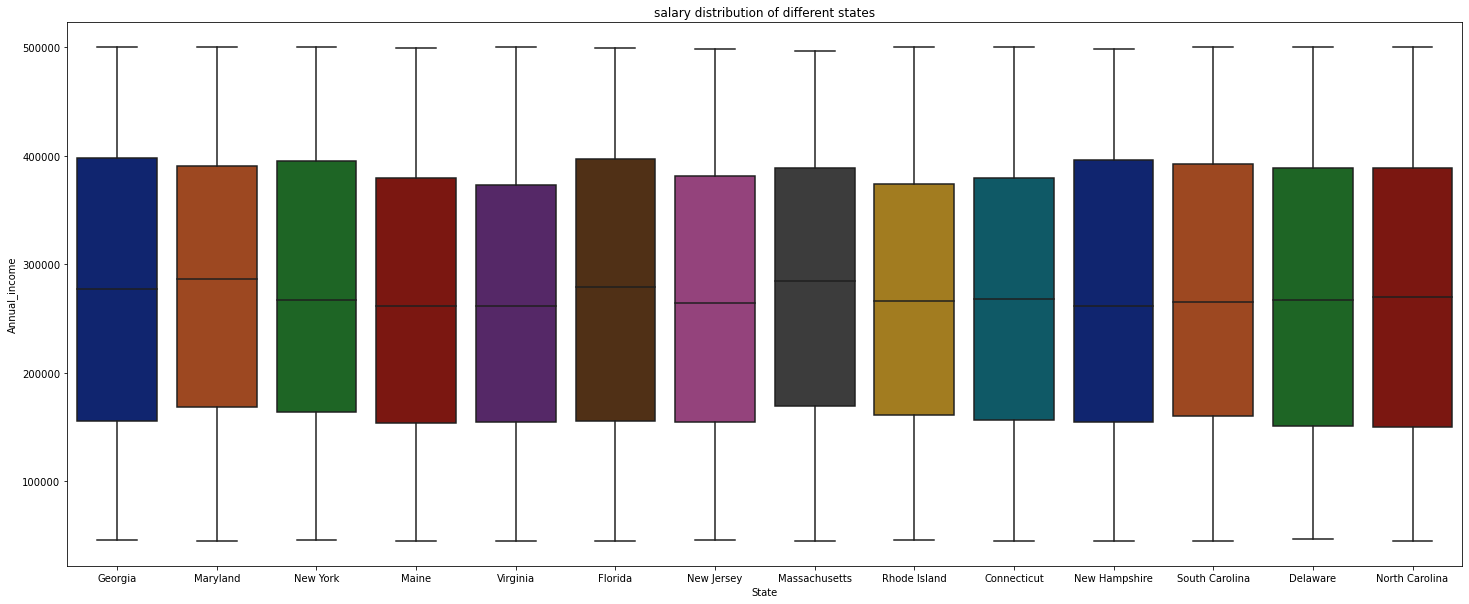

In [33]:
plt.figure(figsize=(25,10))
sns.boxplot(x = ans3_copy['State'],
            y = ans3_copy['Annual_income'], palette='dark')
plt.xlabel('State')
plt.ylabel('Annual_income')
plt.title('salary distribution of different states')
plt.show()

In [21]:
ans4 = pd.merge(df_salary,df_department)
ans4

,Employee_ID,Department_ID,Annual_income,Department_Name
0,29451,1,173651,QA
1,35486,5,112599,Engineering
2,26088,5,193450,Engineering
3,27161,4,233680,HR
4,29303,1,138835,QA
...,...,...,...,...
10495,40817,5,93637,Engineering
10496,37675,5,208056,Engineering
10497,30241,2,273941,Analytics
10498,25033,1,63448,QA


In [22]:
ans4_copy = ans4[['Department_Name','Annual_income']].copy()
ans4_copy

,Department_Name,Annual_income
0,QA,173651
1,Engineering,112599
2,Engineering,193450
3,HR,233680
4,QA,138835
...,...,...
10495,Engineering,93637
10496,Engineering,208056
10497,Analytics,273941
10498,QA,63448


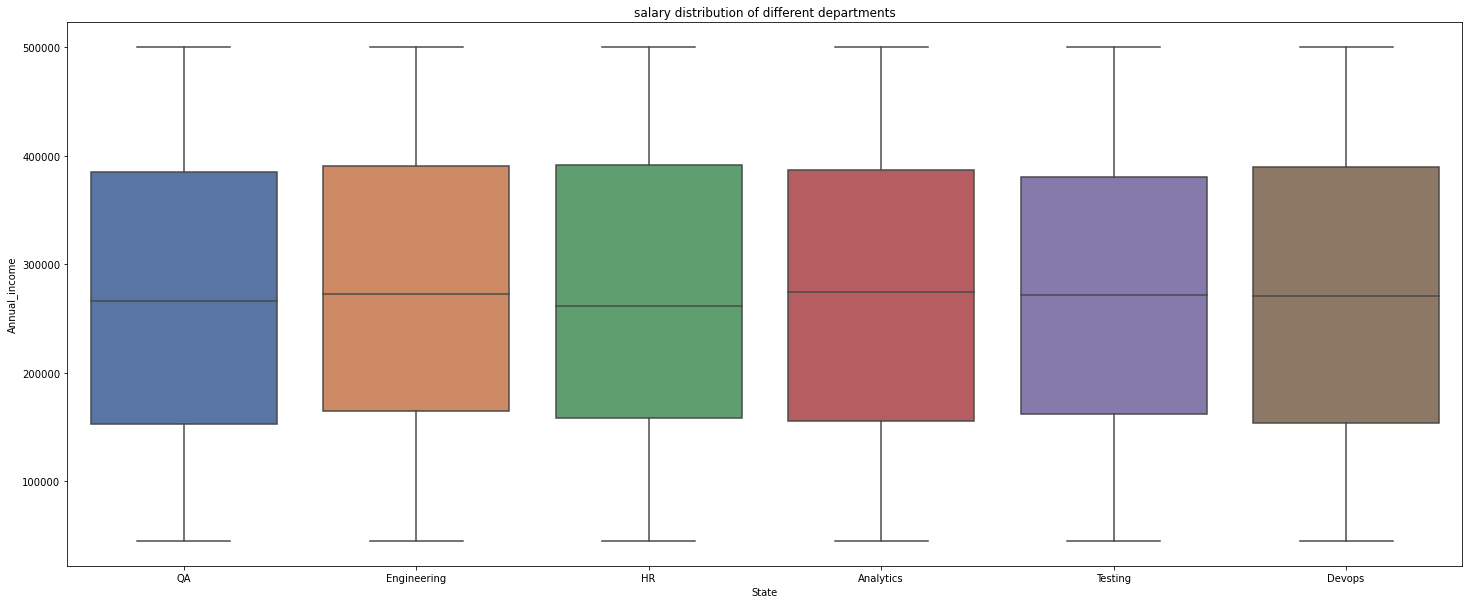

In [39]:
plt.figure(figsize=(25,10))
sns.boxplot(x = ans4_copy['Department_Name'],
            y = ans4_copy['Annual_income'], palette='deep')
plt.xlabel('State')
plt.ylabel('Annual_income')
plt.title('salary distribution of different departments')
plt.show()